In [1]:
from glob import glob

In [3]:
files = glob('/home/husein/ssd3/siti-nurhaliza/*.mp3')
files

['/home/husein/ssd3/siti-nurhaliza/40 Lagu Hits Siti Nurhaliza ｜｜ Wajah Kekasih, Kau Kekasihku, Seribu Kemanisan [BVUFA23UO8U].mp3',
 '/home/husein/ssd3/siti-nurhaliza/Lagu Pop Terbaik Siti Nurhaliza [Cu4rLpUz_h8].mp3',
 '/home/husein/ssd3/siti-nurhaliza/Lagu Pilihan Terbaik Siti Nurhaliza ｜｜ Kesilapanku Keegoanmu , Cindai , Purnama Merindu [isiXP5wsmxw].mp3']

In [4]:
!mkdir siti-nurhaliza

In [6]:
import malaya_speech
from malaya_speech import Pipeline
from malaya_speech.utils.astype import float_to_int

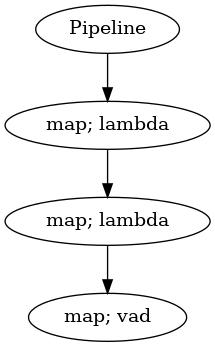

In [7]:
vad_model = malaya_speech.vad.webrtc()
p_vad = Pipeline()
pipeline = (
    p_vad.map(lambda x: malaya_speech.resample(x, old_samplerate = 44100, new_samplerate = 16000))
    .map(lambda x: float_to_int(x, divide_max_abs=False))
    .map(vad_model)
)
p_vad.visualize()

In [20]:
from unidecode import unidecode
import os
import torch
import torchaudio

In [71]:
parent_dir = 'siti-nurhaliza'
!rm -rf {parent_dir}
!mkdir {parent_dir}

In [72]:
parent_dir_done = 'siti-nurhaliza-done'
!rm -rf {parent_dir_done}
!mkdir {parent_dir_done}

In [73]:
from scipy.io.wavfile import write

In [74]:
for f in files:
    new_f = unidecode(os.path.split(f)[1].replace('.mp3', '').replace(' ', '_'))
    f_done = os.path.join(parent_dir_done, new_f)
    if os.path.exists(f_done):
        continue
    samples = malaya_speech.streaming.torchaudio.stream(f, mode_utterence = False,
                                                            vad_model = p_vad,
                                                            segment_length = 882,
                                                            realtime_print = False,
                                                            sample_rate = 44100,
                                                            min_length = 10.0,
                                                            max_length = 10.0
                                                           )
    
    if len(samples):
        parent_new_f = os.path.join(parent_dir, new_f)
        os.makedirs(parent_new_f, exist_ok=True)

        for i in range(len(samples)):
            audio_path = os.path.join(parent_new_f, f'{i}.wav')
            write(audio_path, 44100, samples[i]['wav_data'])
    
    with open(f_done, 'w') as fopen:
        fopen.write('done')

In [75]:
songs = glob('siti-nurhaliza/*/')
len(songs)

3

In [40]:
# import IPython.display as ipd
# ipd.Audio(songs[0])

In [41]:
# ipd.Audio(samples[1]['wav_data'], rate = 44100)